In [ ]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.image as mp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/Main/train.mn.txt') as file:
    mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train.en.txt') as file:
    eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train_images.txt') as file:
    train_images = file.read().split('\n')


In [ ]:
train_images[-1]

''

In [ ]:
#removing last elements which containing special characters
mal_txt.pop()
mal_txt.pop()
eng_txt.pop()
eng_txt.pop()
train_images.pop()
print(len(mal_txt))
print(len(eng_txt))
print(len(train_images))
img_path=[]
for s in train_images:
    img_path.append("/content/drive/My Drive/Main/trainimages/train/"+s)

28930
28931
28931


In [ ]:
print(mal_txt[1])
print(eng_txt[1])

ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
it is an indoor scene						


In [ ]:
mal_txt[0:15]

['ശാന്തമായ  കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ',
 'ഇത് ഒരു ഇൻഡോർ രംഗമാണ്',
 'കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി',
 'മനുഷ്യന് ചെറിയ മുടിയുണ്ട്',
 'ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു',
 'കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട്',
 'ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി',
 'ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ്',
 'മതിൽ വെളുത്ത ചായം പൂശി',
 'ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ',
 'സമുദ്രം അഭിമുഖീകരിക്കുന്ന സ്ത്രീ',
 'ഇതൊരു ഓഫീസ് രേഖാചിത്രം',
 'നാല് ലോഹത്തിന്റെ കസേരകൾ',
 'കോലാഹലം ഒരു മേശപ്പുറത്താണ്',
 'ഒരു വെളുത്ത മൈക്രോവേവ് ഓവൻ']

In [ ]:
eng_txt[0:15]

['Male surfer surfing in still in the ocean',
 'it is an indoor scene\t\t\t\t\t\t',
 'Computer screens turned on\t\t\t\t\t\t',
 'man has short hair\t\t\t\t\t\t',
 "photo album open on an adult's lap\t\t\t\t\t\t",
 'there is a group of girls beside the black car\t\t\t\t\t\t',
 'Child in a stroller\t\t\t\t\t\t',
 'Tall metal lightpost\t\t\t\t\t\t',
 'wall is painted white\t\t\t\t\t\t',
 'there are several pictures on the wall\t\t\t\t\t\t',
 'woman facing the ocean\t\t\t\t\t\t',
 'this is an office layout\t\t\t\t\t\t',
 'four metallic chairs\t\t\t\t\t\t',
 'Clutter is on a table\t\t\t\t\t\t',
 'a white microwave oven\t\t\t\t\t\t']

/content/drive/My Drive/Main/trainimages/train/11.jpg
mal:ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
eng:it is an indoor scene						


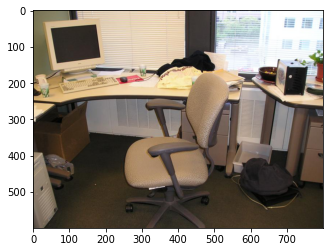

In [ ]:
im=mp.imread(img_path[1])
plt.imshow(im)
print(img_path[1])
print("mal:"+mal_txt[1])
print("eng:"+eng_txt[1])

/content/drive/My Drive/Main/trainimages/train/10.jpg
mal:ശാന്തമായ  കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ
eng:Male surfer surfing in still in the ocean


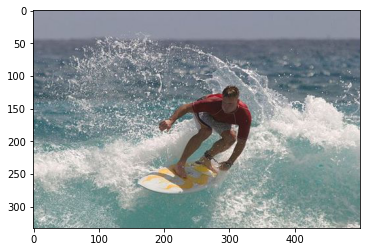

In [ ]:
im=mp.imread(img_path[0])
plt.imshow(im)
print(img_path[0])
print("mal:"+mal_txt[0])
print("eng:"+eng_txt[0])

In [ ]:
#Manually splitting data for training and texting-due to presence of 3 inputs split using Sklearn  is not efficeint
splits=10000
mal_train=mal_txt[:splits]
eng_train=eng_txt[:splits]

In [ ]:
mal_df = pd.DataFrame(mal_train, columns=['Malayalam']) 
eng_df = pd.DataFrame(eng_train, columns=['English']) 


In [ ]:
mal_df.head(10)

,Malayalam
0,ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ
1,ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
2,കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി
3,മനുഷ്യന് ചെറിയ മുടിയുണ്ട്
4,ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു
5,കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട്
6,ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി
7,ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ്
8,മതിൽ വെളുത്ത ചായം പൂശി
9,ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന...


In [ ]:
eng_df.head(10)

,English
0,Male surfer surfing in still in the ocean
1,it is an indoor scene\t\t\t\t\t\t
2,Computer screens turned on\t\t\t\t\t\t
3,man has short hair\t\t\t\t\t\t
4,photo album open on an adult's lap\t\t\t\t\t\t
5,there is a group of girls beside the black car...
6,Child in a stroller\t\t\t\t\t\t
7,Tall metal lightpost\t\t\t\t\t\t
8,wall is painted white\t\t\t\t\t\t
9,there are several pictures on the wall\t\t\t\t...


In [ ]:
#Datacleaning by removing special characters
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r" ᠃", "", text)
    text = re.sub(r" ᠂", "", text)
    text = re.sub(r"-", " ", text)
    text = re.sub(r"<5>", "5", text)
    text = re.sub(r"“ ", "", text)
    text = re.sub(r" ”", "", text)
    text = re.sub(r"[+\.\!\/_,$%^*(+\"\']+|[+——！，〈〉《》。︱？?、．％~@#￥%……&*（）’]", "", text)
    text=text.rstrip()
    return text



In [ ]:
mal_text1 = mal_df["Malayalam"].apply(clean_text)
eng_text1 = eng_df["English"].apply(clean_text)
mal_text2 = list(mal_text1.values)
eng_text2 = list(eng_text1.values)

In [ ]:
#cleaned Malayalm data
mal_text1

0        ശാന്തമായ  കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ
1                              ഇത് ഒരു ഇൻഡോർ രംഗമാണ്
2                     കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി
3                          മനുഷ്യന് ചെറിയ മുടിയുണ്ട്
4       ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു
                            ...                     
4995            ഫ്രിസ്‌ബീ ഉള്ള പുൽത്തകിടിയിൽ ഒരു നായ
4996        ഒരു ഉദ്യാനത്തിൽ ചാരനിറത്തിലുള്ള ലോഹ വേലി
4997               തവിട്ടുനിറമുള്ള മുടിയുള്ള മനുഷ്യൻ
4998                    ഒരു ജിറാഫ് പുല്ല് തിന്നുന്നു
4999                      മുൻവശത്തുള്ള ഒരു പെൺകുട്ടി
Name: Malayalam, Length: 5000, dtype: object

In [ ]:
#cleaned English data
eng_text1

0       male surfer surfing in still in the ocean
1                           it is an indoor scene
2                      computer screens turned on
3                              man has short hair
4               photo album open on an adults lap
                          ...                    
4995               a dog on a lawn with a frisbee
4996                 a gray metal fence in a park
4997                           a brown haired man
4998                           the floor is tiled
4999               a young girl in the foreground
Name: English, Length: 5000, dtype: object

In [ ]:
mal_text2[1:5]

['ഇത് ഒരു ഇൻഡോർ രംഗമാണ്',
 'കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി',
 'മനുഷ്യന് ചെറിയ മുടിയുണ്ട്',
 'ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു']

In [ ]:
eng_text2[1:5]

['it is an indoor scene',
 'computer screens turned on',
 'man has short hair',
 'photo album open on an adults lap']

In [ ]:
#Adding starting and ending tokens
mal_temp=[]
for s in mal_text2:
    temp="sos "+s+" eos"
    mal_temp.append(temp)
#text2=[]
mal_text2=mal_temp
mal_text2[1:10]

['sos ഇത് ഒരു ഇൻഡോർ രംഗമാണ് eos',
 'sos കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി eos',
 'sos മനുഷ്യന് ചെറിയ മുടിയുണ്ട് eos',
 'sos ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു eos',
 'sos കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട് eos',
 'sos ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി eos',
 'sos ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ് eos',
 'sos മതിൽ വെളുത്ത ചായം പൂശി eos',
 'sos ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


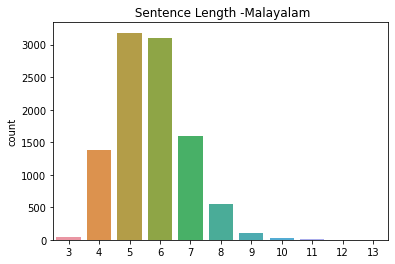

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
malayalam_words = []
for i in mal_text2:
    malayalam_words.append(len(i.split()))
sn.countplot(malayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


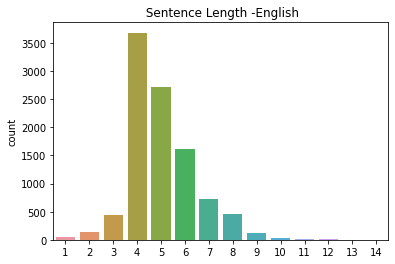

In [ ]:
english_words = []
for j in eng_text2:
    english_words.append(len(j.split()))
sn.countplot(english_words).set(title=' Sentence Length -English')
plt.show()

In [ ]:
maxlen_malayalam = max(malayalam_words)
maxlen_english = max(english_words)
print('Maximum sentence length-Malayalam :',maxlen_malayalam)
print('Maximum sentence length-English :',maxlen_english)

Maximum sentence length-Malayalam : 13
Maximum sentence length-English : 14


In [ ]:
#splitting training data into training and validation data
x_tr=eng_text2[:splits-2000]
y_tr=mal_text2[:splits-2000]
x_val=eng_text2[splits-2000:]
y_val=mal_text2[splits-2000:]


In [ ]:
x_tr[1:5]

['it is an indoor scene',
 'computer screens turned on',
 'man has short hair',
 'photo album open on an adults lap']

In [ ]:
y_tr[1:5]

['sos ഇത് ഒരു ഇൻഡോർ രംഗമാണ് eos',
 'sos കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി eos',
 'sos മനുഷ്യന് ചെറിയ മുടിയുണ്ട് eos',
 'sos ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു eos']

In [ ]:
len(x_tr)

9500

In [ ]:
len(x_val)

500

In [ ]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
x_tokens = Tokenizer()
x_tokens.fit_on_texts(x_tr)
x_tr = x_tokens.texts_to_sequences(x_tr)
x_val = x_tokens.texts_to_sequences(x_val)
print('x_tr:',x_tr)
print('x_val:',x_val)

x_tr: [[446, 223, 272, 6, 737, 6, 2, 265], [147, 5, 35, 1076, 192], [112, 1462, 447, 3], [8, 42, 239, 65], [203, 1463, 152, 3, 35, 1464, 643], [228, 5, 1, 185, 4, 477, 371, 2, 10, 31], [170, 6, 1, 850], [133, 113, 1465], [17, 5, 255, 7], [228, 41, 307, 644, 3, 2, 17], [18, 353, 2, 265], [14, 5, 35, 448, 1466], [308, 1077, 421], [1467, 5, 3, 1, 33], [1, 7, 309, 391], [7, 392, 229, 289, 575], [15, 322, 25, 11, 77], [8, 6, 91, 218, 323, 3, 13], [22, 3, 2, 13], [1, 8, 38, 6, 576, 372], [290, 110, 3, 17], [193, 4, 2, 102], [22, 4, 1, 86], [2, 324, 5, 164], [1, 8, 478, 1, 325], [1, 15, 851, 6, 29], [154, 11, 738, 373], [230, 3, 2, 46], [1, 645, 7, 46], [10, 168, 393], [1, 15, 1078, 525, 6, 2, 224, 4, 2, 31], [20, 31, 64, 394, 1, 25], [31, 3, 2, 25], [852, 1079, 19, 1468], [1, 10, 31, 11, 1, 23, 134], [102, 62, 2, 33], [1, 1469, 53, 3, 1, 210], [131, 291, 4, 1, 13], [22, 3, 1, 13], [21, 33, 38, 3, 55, 4, 1, 107], [107, 154, 5, 3], [1, 23, 48], [395, 4, 2, 54], [646, 63, 194, 2, 13], [577, 10,

In [ ]:
#padding with post (appending zeros at the end to equalize sentence length)
from keras.preprocessing.sequence import pad_sequences
x_tr = pad_sequences(x_tr,maxlen = maxlen_english,padding = 'post')
x_val = pad_sequences(x_val,maxlen = maxlen_english,padding = 'post')

# +1 for padding 
x_voc_size   =  len(x_tokens.word_index) +1
print("No of unique words in English",x_voc_size)

No of unique words in English 2765


In [ ]:
# English data preprocessing
from keras.preprocessing.text import Tokenizer
y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tr)

y_tr = y_tokens.texts_to_sequences(y_tr)
y_val = y_tokens.texts_to_sequences(y_val)

from keras.preprocessing.sequence import pad_sequences
y_tr = pad_sequences(y_tr,maxlen = maxlen_malayalam,padding = 'post')
y_val = pad_sequences(y_val,maxlen = maxlen_malayalam,padding = 'post')

# +1 for padding 
y_voc_size   =  len(y_tokens.word_index) +1
print("No of unique words in Malyalam",y_voc_size)


No of unique words in Malyalam 5093


In [ ]:
pip install keras-applications

     |████████████████████████████████| 50 kB 4.5 MB/s 


In [ ]:
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings


In [ ]:
#Loading VGG model for Feature Extraction-Removing classification layers from memory
modelvgg = VGG16(include_top=True,weights="imagenet")
modelvgg.layers.pop()
modelvgg = Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output)
modelvgg.summary()

553476096/553467096 [==============================] - 6s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf

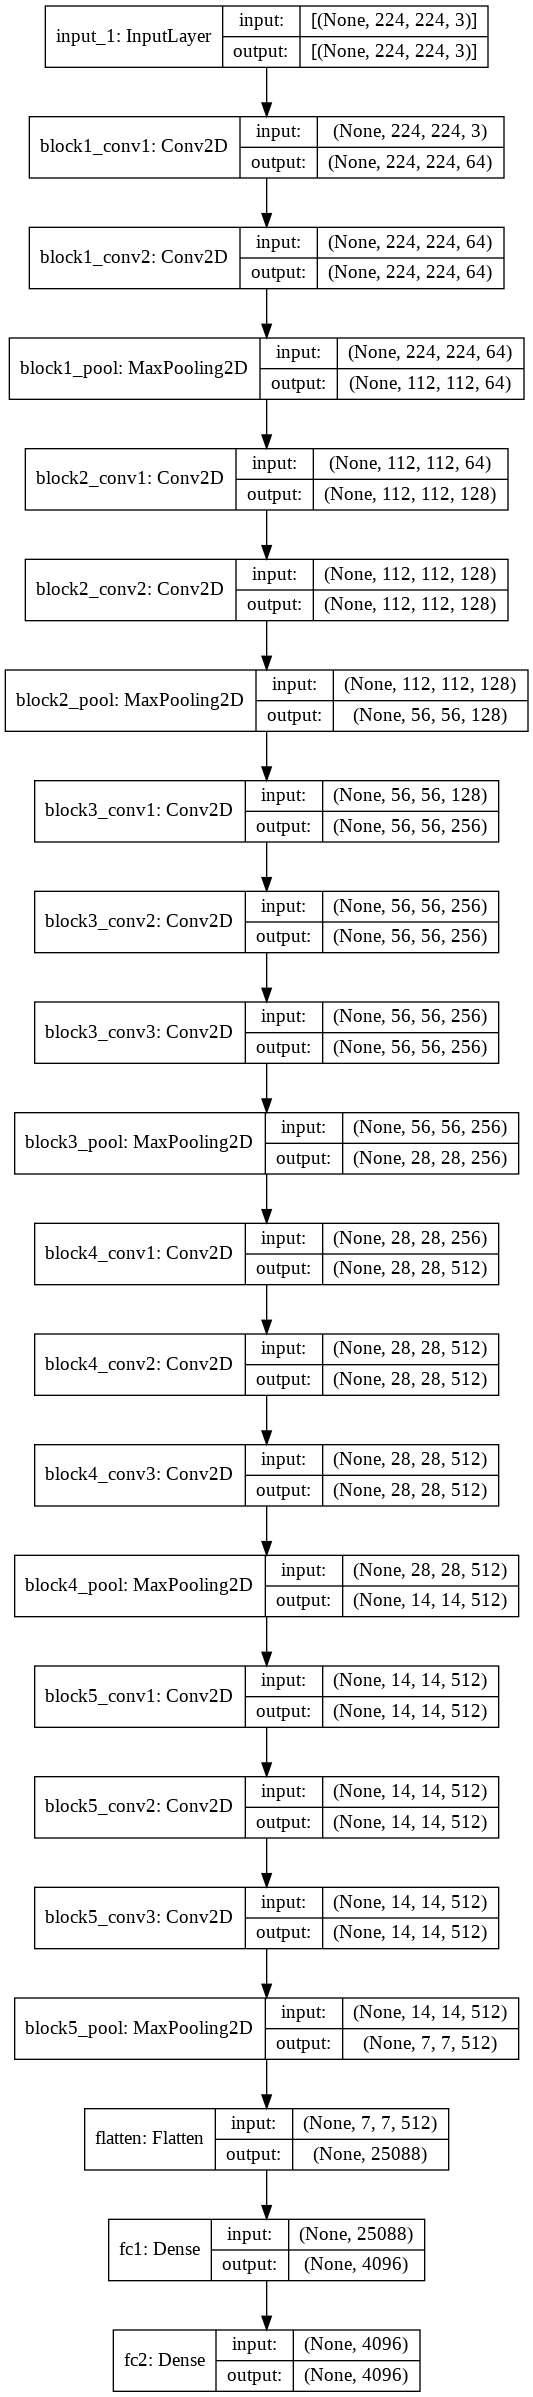

In [ ]:
tf.keras.utils.plot_model(
    modelvgg,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
pip install cv

In [ ]:
import cv2
import cv

ERROR:root:Error disabling cv.imshow().
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/_import_hooks/_cv2.py", line 86, in load_module
    cv_module.imshow,
AttributeError: module 'cv' has no attribute 'imshow'


In [ ]:
#tRY RESNET

In [ ]:
#Resizing image and converting grey scale images into RGB images
#split=5000
imagedata=np.zeros(shape=(splits,224,224,3))
for i in range(splits):
    temp=mp.imread(img_path[i])
    if (len(temp.shape)==3):
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp
    elif (len(temp.shape)<3):
       #plt.imshow(temp)
       temp=cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
       temp=cv2.resize(temp,(224,224))
       imagedata[i]=temp    
imagedata=imagedata/255
imagedata=imagedata.astype(np.float16)

In [ ]:
temp1=mp.imread(img_path[1])
len(temp1)

600

In [ ]:
a=imagedata[1]
len(a)

224

In [ ]:
with open('/content/drive/My Drive/Main/imagedatas.txt', 'w') as writefile:
    writefile.write("imagedata")

In [ ]:
#preprocessing images
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict
jpgs=img_path[:splits]
images_new = OrderedDict()
npix = 224
target_size = (npix,npix,3)
for i,name in enumerate(jpgs): 
    filename = name
    image = load_img(filename, target_size=target_size)
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    nimage = preprocess_input(image)
    y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3]))
    images_new [name] = y_pred.flatten()
    if i%200==0:
        print(i,filename)

0 /content/drive/My Drive/Main/trainimages/train/10.jpg
200 /content/drive/My Drive/Main/trainimages/train/739.jpg
400 /content/drive/My Drive/Main/trainimages/train/1529.jpg
600 /content/drive/My Drive/Main/trainimages/train/2238.jpg
800 /content/drive/My Drive/Main/trainimages/train/2970.jpg


In [ ]:
print(list(images_new.values())[1])

[0.6324536 1.3856603 0.        ... 0.        0.        2.182263 ]


In [ ]:
#storing image pixels sepearetely
vgg_feature=np.zeros(shape=(len(jpgs),4096))
for i in range(len(jpgs)):
    vgg_feature[i]=images_new[jpgs[i]]
vgg_feature[1:10]

array([[0.63245589, 1.38566315, 0.        , ..., 0.        , 0.        ,
        2.18226528],
       [0.54209173, 0.        , 0.        , ..., 0.        , 0.        ,
        0.9331218 ],
       [1.52150476, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11626506, 1.35216784, 0.05647528, ..., 0.        , 2.70661378,
        0.        ],
       [2.49456167, 1.68215251, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26692492, 4.3635993 , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
vgg_feature=np.load('/content/drive/My Drive/Main/densefeature.npy', encoding='bytes')

In [ ]:
#splitting image pixels for training and validation
vgg_train_=vgg_feature[:splits-2000]
vgg_val=vgg_feature[splits-2000:]

In [ ]:
#Generating a repeat vector from image pixels
img_inputs=Input(shape=(1920,))
d_1=Dense(512, activation='relu')(img_inputs)
r_1=RepeatVector(maxlen_english)(d_1)
vf_model = Model(img_inputs, r_1)
vf_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1920)]            0         
                                                                 
 dense_5 (Dense)             (None, 512)               983552    
                                                                 
 repeat_vector_2 (RepeatVect  (None, 14, 512)          0         
 or)                                                             
                                                                 
Total params: 983,552
Trainable params: 983,552
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_voc=x_voc_size
y_voc=y_voc_size

In [ ]:
#Model
x_voc=x_voc_size
y_voc=y_voc_size
latent_dim = 512
embedding_dim=512
#Encoder
encoder_inputs = Input(shape=(maxlen_english,))
#The model will take as input an integer matrix of size (batch,input_length)and the largest integer (i.e. word index) in the input
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)
print(encoder_inputs.get_shape)
print(enc_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 14) dtype=float32 (created by layer 'input_17')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 14, 512) dtype=float32 (created by layer 'embedding_7')>>


In [ ]:
#encoder LSTM Layer 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
#The dimension of each state equals to the LSTM unit number
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
print(encoder_lstm1.output_shape)


[(None, 14, 512), (None, 512), (None, 512)]


In [ ]:
#LSTM layer 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
print(encoder_lstm2.output_shape)

[(None, 14, 512), (None, 512), (None, 512)]


In [ ]:
#Concatenating image features with text input 
encoder_output2=Concatenate(axis=-1)([encoder_output2,r_1])

In [ ]:
#LSTM layer 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)
print(encoder_lstm3.output_shape)

[(None, 14, 512), (None, 512), (None, 512)]


In [ ]:
#Decoder
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
print(decoder_inputs.get_shape)
print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_18')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None, 512) dtype=float32 (created by layer 'embedding_8')>>


In [ ]:
#Decoder LSTM layer1
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])
print(decoder_lstm.output_shape)

[(None, None, 512), (None, 512), (None, 512)]


In [ ]:
#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)
print(decoder_dense.output_shape)

(None, None, 5093)


In [ ]:
model = Model([encoder_inputs,decoder_inputs,img_inputs], decoder_outputs)
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 14)]         0           []                               
                                                                                                  
 embedding_7 (Embedding)        (None, 14, 512)      1415680     ['input_17[0][0]']               
                                                                                                  
 input_16 (InputLayer)          [(None, 1920)]       0           []                               
                                                                                                  
 lstm_15 (LSTM)                 [(None, 14, 512),    2099200     ['embedding_7[0][0]']            
                                 (None, 512),                                              

In [ ]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf

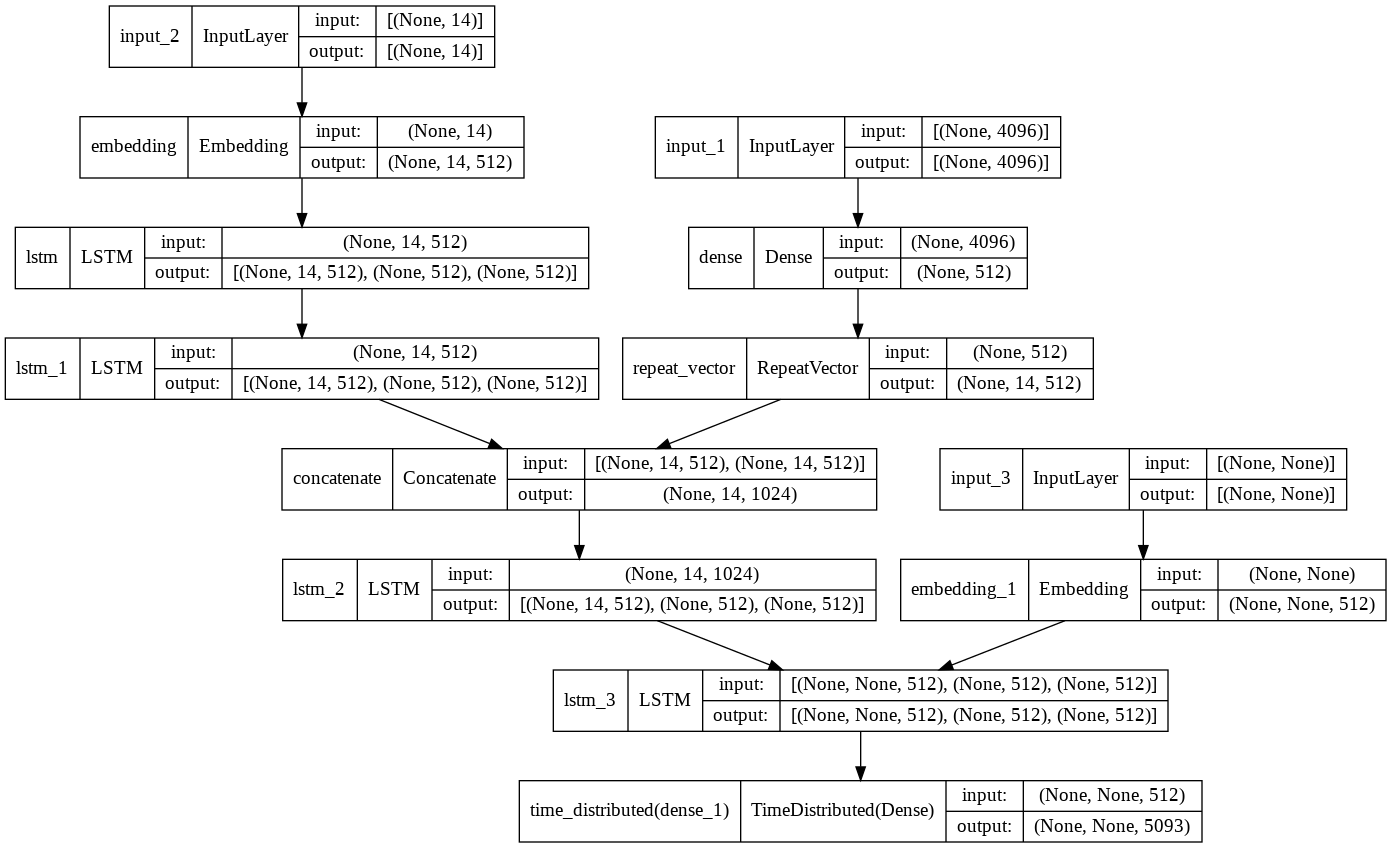

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/My Drive/Main/densemodel5000", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
#compiling model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit([x_tr,y_tr[:,:-1],vgg_train_], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,validation_data=([x_val,y_val[:,:-1],vgg_val], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]),epochs=100,batch_size=512,callbacks= callbacks_list)

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 4.2674 - accuracy: 0.5683INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 26s 1s/step - loss: 4.2674 - accuracy: 0.5683 - val_loss: 2.2703 - val_accuracy: 0.6407
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 2.4919 - accuracy: 0.6400INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 2.4919 - accuracy: 0.6400 - val_loss: 2.0863 - val_accuracy: 0.6852
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 2.3157 - accuracy: 0.6668INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 2.3157 - accuracy: 0.6668 - val_loss: 1.9886 - val_accuracy: 0.7047
Epoch 4/100
16/16 [==============================] - ETA: 0s - loss: 2.2080 - accuracy: 0.6966INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 2.2080 - accuracy: 0.6966 - val_loss: 1.8968 - val_accuracy: 0.7307
Epoch 5/100
16/16 [==============================] - ETA: 0s - loss: 2.1296 - accuracy: 0.7115INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 2.1296 - accuracy: 0.7115 - val_loss: 1.8476 - val_accuracy: 0.7392
Epoch 6/100
16/16 [==============================] - ETA: 0s - loss: 2.0796 - accuracy: 0.7144INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 2.0796 - accuracy: 0.7144 - val_loss: 1.8214 - val_accuracy: 0.7395
Epoch 7/100
16/16 [==============================] - ETA: 0s - loss: 2.0378 - accuracy: 0.7156INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 16s 1s/step - loss: 2.0378 - accuracy: 0.7156 - val_loss: 1.7904 - val_accuracy: 0.7402
Epoch 8/100
16/16 [==============================] - ETA: 0s - loss: 1.9953 - accuracy: 0.7197INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 18s 1s/step - loss: 1.9953 - accuracy: 0.7197 - val_loss: 1.7676 - val_accuracy: 0.7462
Epoch 9/100
16/16 [==============================] - ETA: 0s - loss: 1.9511 - accuracy: 0.7281INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.9511 - accuracy: 0.7281 - val_loss: 1.7395 - val_accuracy: 0.7488
Epoch 10/100
16/16 [==============================] - ETA: 0s - loss: 1.9075 - accuracy: 0.7327INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.9075 - accuracy: 0.7327 - val_loss: 1.7119 - val_accuracy: 0.7599
Epoch 11/100
16/16 [==============================] - ETA: 0s - loss: 1.8655 - accuracy: 0.7398INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.8655 - accuracy: 0.7398 - val_loss: 1.6819 - val_accuracy: 0.7646
Epoch 12/100
16/16 [==============================] - ETA: 0s - loss: 1.8243 - accuracy: 0.7456INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 16s 1s/step - loss: 1.8243 - accuracy: 0.7456 - val_loss: 1.6543 - val_accuracy: 0.7697
Epoch 13/100
16/16 [==============================] - ETA: 0s - loss: 1.7855 - accuracy: 0.7505INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 18s 1s/step - loss: 1.7855 - accuracy: 0.7505 - val_loss: 1.6333 - val_accuracy: 0.7713
Epoch 14/100
16/16 [==============================] - ETA: 0s - loss: 1.7510 - accuracy: 0.7532INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.7510 - accuracy: 0.7532 - val_loss: 1.6157 - val_accuracy: 0.7745
Epoch 15/100
16/16 [==============================] - ETA: 0s - loss: 1.7208 - accuracy: 0.7559INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.7208 - accuracy: 0.7559 - val_loss: 1.6038 - val_accuracy: 0.7754
Epoch 16/100
16/16 [==============================] - ETA: 0s - loss: 1.6946 - accuracy: 0.7569INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.6946 - accuracy: 0.7569 - val_loss: 1.5949 - val_accuracy: 0.7767
Epoch 17/100
16/16 [==============================] - ETA: 0s - loss: 1.6701 - accuracy: 0.7580INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 16s 1s/step - loss: 1.6701 - accuracy: 0.7580 - val_loss: 1.5879 - val_accuracy: 0.7771
Epoch 18/100
16/16 [==============================] - ETA: 0s - loss: 1.6481 - accuracy: 0.7595INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 18s 1s/step - loss: 1.6481 - accuracy: 0.7595 - val_loss: 1.5853 - val_accuracy: 0.7767
Epoch 19/100
16/16 [==============================] - ETA: 0s - loss: 1.6269 - accuracy: 0.7606INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.6269 - accuracy: 0.7606 - val_loss: 1.5805 - val_accuracy: 0.7772
Epoch 20/100
16/16 [==============================] - ETA: 0s - loss: 1.6063 - accuracy: 0.7618INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.6063 - accuracy: 0.7618 - val_loss: 1.5790 - val_accuracy: 0.7776
Epoch 21/100
16/16 [==============================] - ETA: 0s - loss: 1.5862 - accuracy: 0.7630INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.5862 - accuracy: 0.7630 - val_loss: 1.5752 - val_accuracy: 0.7780
Epoch 22/100
16/16 [==============================] - ETA: 0s - loss: 1.5654 - accuracy: 0.7643INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.5654 - accuracy: 0.7643 - val_loss: 1.5725 - val_accuracy: 0.7782
Epoch 23/100
16/16 [==============================] - ETA: 0s - loss: 1.5456 - accuracy: 0.7655INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.5456 - accuracy: 0.7655 - val_loss: 1.5724 - val_accuracy: 0.7779
Epoch 24/100
16/16 [==============================] - ETA: 0s - loss: 1.5265 - accuracy: 0.7666INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 16s 1s/step - loss: 1.5265 - accuracy: 0.7666 - val_loss: 1.5707 - val_accuracy: 0.7788
Epoch 25/100
16/16 [==============================] - ETA: 0s - loss: 1.5076 - accuracy: 0.7676INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 18s 1s/step - loss: 1.5076 - accuracy: 0.7676 - val_loss: 1.5712 - val_accuracy: 0.7791
Epoch 26/100
16/16 [==============================] - ETA: 0s - loss: 1.4891 - accuracy: 0.7685INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.4891 - accuracy: 0.7685 - val_loss: 1.5692 - val_accuracy: 0.7792
Epoch 27/100
16/16 [==============================] - ETA: 0s - loss: 1.4708 - accuracy: 0.7695INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.4708 - accuracy: 0.7695 - val_loss: 1.5709 - val_accuracy: 0.7797
Epoch 28/100
16/16 [==============================] - ETA: 0s - loss: 1.4531 - accuracy: 0.7710INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.4531 - accuracy: 0.7710 - val_loss: 1.5710 - val_accuracy: 0.7799
Epoch 29/100
16/16 [==============================] - ETA: 0s - loss: 1.4352 - accuracy: 0.7718INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 18s 1s/step - loss: 1.4352 - accuracy: 0.7718 - val_loss: 1.5708 - val_accuracy: 0.7801
Epoch 30/100
16/16 [==============================] - ETA: 0s - loss: 1.4178 - accuracy: 0.7732INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.4178 - accuracy: 0.7732 - val_loss: 1.5726 - val_accuracy: 0.7800
Epoch 31/100
16/16 [==============================] - ETA: 0s - loss: 1.4004 - accuracy: 0.7737INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.4004 - accuracy: 0.7737 - val_loss: 1.5744 - val_accuracy: 0.7795
Epoch 32/100
16/16 [==============================] - ETA: 0s - loss: 1.3830 - accuracy: 0.7750INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 16s 1s/step - loss: 1.3830 - accuracy: 0.7750 - val_loss: 1.5754 - val_accuracy: 0.7801
Epoch 33/100
16/16 [==============================] - ETA: 0s - loss: 1.3666 - accuracy: 0.7764INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.3666 - accuracy: 0.7764 - val_loss: 1.5773 - val_accuracy: 0.7801
Epoch 34/100
16/16 [==============================] - ETA: 0s - loss: 1.3497 - accuracy: 0.7777INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Main/densemodel5000/assets


16/16 [==============================] - 17s 1s/step - loss: 1.3497 - accuracy: 0.7777 - val_loss: 1.5804 - val_accuracy: 0.7798


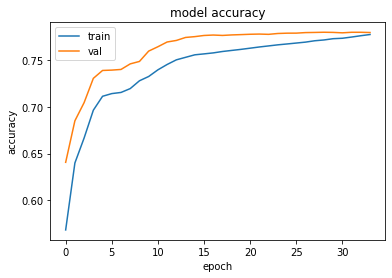

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

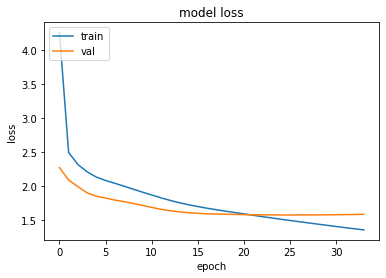

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights("/content/drive/My Drive/Main/modeldesnel10.h5")

In [ ]:
reverse_target_word_index=y_tokens.index_word
reverse_target_word_index

{1: 'sos',
 2: 'eos',
 3: 'ഒരു',
 4: 'കറുത്ത',
 5: 'വെളുത്ത',
 6: 'സ്ത്രീ',
 7: 'ധരിച്ച',
 8: 'മനുഷ്യൻ',
 9: 'പച്ച',
 10: 'ബാഗ്',
 11: 'വലിയ',
 12: 'നീല',
 13: 'വർണ്ണാഭമായ',
 14: 'ചുവന്ന',
 15: 'ട്രാഷ്',
 16: 'ചാരനിറത്തിലുള്ള',
 17: 'സ്കാർഫ്',
 18: 'വിൻഡോ',
 19: 'മഞ്ഞ',
 20: 'ഇതൊരു',
 21: 'റോഡിന്റെ',
 22: 'വ്യക്തി',
 23: 'കെട്ടിടത്തിലെ',
 24: 'പുല്ലിന്റെ',
 25: 'രണ്ട്',
 26: 'ചെറിയ',
 27: 'വശങ്ങളിൽ',
 28: 'സ്ട്രിപ്പുകൾ',
 29: 'ആന',
 30: 'നിലത്ത്',
 31: 'വെള്ള',
 32: 'ഉള്ള',
 33: 'ചുവപ്പ്',
 34: 'തവിട്ട്',
 35: 'കുഞ്ഞ്',
 36: 'ഒരാൾ',
 37: 'കാർ',
 38: 'ജിറാഫ്',
 39: 'കെട്ടിടത്തിന്റെ',
 40: 'മുകളിൽ',
 41: 'ഓറഞ്ച്',
 42: 'വെള്ളയും',
 43: 'പുല്ല്',
 44: 'എഞ്ചിൻ',
 45: 'മേശപ്പുറത്ത്',
 46: 'രംഗം',
 47: 'ചിഹ്നം',
 48: 'നിറമുള്ള',
 49: 'ബീച്ച്',
 50: 'വശത്ത്',
 51: 'ആളുകൾ',
 52: 'ടെന്നീസ്',
 53: 'ദ്വീപ്',
 54: 'തലം',
 55: 'മതിൽ',
 56: 'പുള്ളി',
 57: 'ഇരിക്കുന്നു',
 58: 'ട്രെയിൻ',
 59: 'ഇത്',
 60: 'മരം',
 61: 'നിൽക്കുന്ന',
 62: 'തെരുവിൽ',
 63: 'തിന്നുന്നു',
 64: 'നായ',
 65: 'പാർക്ക്',
 66: 'ബസ്

In [ ]:

reverse_source_word_index=x_tokens.index_word
reverse_source_word_index

{1: 'a',
 2: 'the',
 3: 'on',
 4: 'of',
 5: 'is',
 6: 'in',
 7: 'white',
 8: 'man',
 9: 'and',
 10: 'black',
 11: 'with',
 12: 'red',
 13: 'building',
 14: 'this',
 15: 'person',
 16: 'blue',
 17: 'wall',
 18: 'woman',
 19: 'wearing',
 20: 'green',
 21: 'brown',
 22: 'window',
 23: 'yellow',
 24: 'sign',
 25: 'street',
 26: 'side',
 27: 'two',
 28: 'head',
 29: 'water',
 30: 'sky',
 31: 'car',
 32: 'train',
 33: 'table',
 34: 'light',
 35: 'an',
 36: 'shirt',
 37: 'large',
 38: 'standing',
 39: 'sitting',
 40: 'clock',
 41: 'are',
 42: 'has',
 43: 'holding',
 44: 'people',
 45: 'road',
 46: 'plate',
 47: 'small',
 48: 'bus',
 49: 'to',
 50: 'dog',
 51: 'grass',
 52: 'tennis',
 53: 'orange',
 54: 'tree',
 55: 'top',
 56: 'silver',
 57: 'boy',
 58: 'cat',
 59: 'walking',
 60: 'ground',
 61: 'plane',
 62: 'at',
 63: 'bench',
 64: 'parked',
 65: 'hair',
 66: 'front',
 67: 'glass',
 68: 'truck',
 69: 'wooden',
 70: 'girl',
 71: 'bear',
 72: 'field',
 73: 'bird',
 74: 'baseball',
 75: 'part'

In [ ]:

target_word_index=y_tokens.word_index
target_word_index

{'sos': 1,
 'eos': 2,
 'ഒരു': 3,
 'കറുത്ത': 4,
 'വെളുത്ത': 5,
 'സ്ത്രീ': 6,
 'ധരിച്ച': 7,
 'മനുഷ്യൻ': 8,
 'പച്ച': 9,
 'ബാഗ്': 10,
 'വലിയ': 11,
 'നീല': 12,
 'വർണ്ണാഭമായ': 13,
 'ചുവന്ന': 14,
 'ട്രാഷ്': 15,
 'ചാരനിറത്തിലുള്ള': 16,
 'സ്കാർഫ്': 17,
 'വിൻഡോ': 18,
 'മഞ്ഞ': 19,
 'ഇതൊരു': 20,
 'റോഡിന്റെ': 21,
 'വ്യക്തി': 22,
 'കെട്ടിടത്തിലെ': 23,
 'പുല്ലിന്റെ': 24,
 'രണ്ട്': 25,
 'ചെറിയ': 26,
 'വശങ്ങളിൽ': 27,
 'സ്ട്രിപ്പുകൾ': 28,
 'ആന': 29,
 'നിലത്ത്': 30,
 'വെള്ള': 31,
 'ഉള്ള': 32,
 'ചുവപ്പ്': 33,
 'തവിട്ട്': 34,
 'കുഞ്ഞ്': 35,
 'ഒരാൾ': 36,
 'കാർ': 37,
 'ജിറാഫ്': 38,
 'കെട്ടിടത്തിന്റെ': 39,
 'മുകളിൽ': 40,
 'ഓറഞ്ച്': 41,
 'വെള്ളയും': 42,
 'പുല്ല്': 43,
 'എഞ്ചിൻ': 44,
 'മേശപ്പുറത്ത്': 45,
 'രംഗം': 46,
 'ചിഹ്നം': 47,
 'നിറമുള്ള': 48,
 'ബീച്ച്': 49,
 'വശത്ത്': 50,
 'ആളുകൾ': 51,
 'ടെന്നീസ്': 52,
 'ദ്വീപ്': 53,
 'തലം': 54,
 'മതിൽ': 55,
 'പുള്ളി': 56,
 'ഇരിക്കുന്നു': 57,
 'ട്രെയിൻ': 58,
 'ഇത്': 59,
 'മരം': 60,
 'നിൽക്കുന്ന': 61,
 'തെരുവിൽ': 62,
 'തിന്നുന്നു': 63,
 'നായ': 64,
 'പാർക്ക്': 65,
 'ബസ്': 6

In [ ]:

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=[encoder_inputs,img_inputs],outputs=[encoder_outputs, state_h, state_c])
encoder_model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 14)]         0           []                               
                                                                                                  
 embedding_7 (Embedding)        (None, 14, 512)      1415680     ['input_17[0][0]']               
                                                                                                  
 input_16 (InputLayer)          [(None, 1920)]       0           []                               
                                                                                                  
 lstm_15 (LSTM)                 [(None, 14, 512),    2099200     ['embedding_7[0][0]']            
                                 (None, 512),                                              

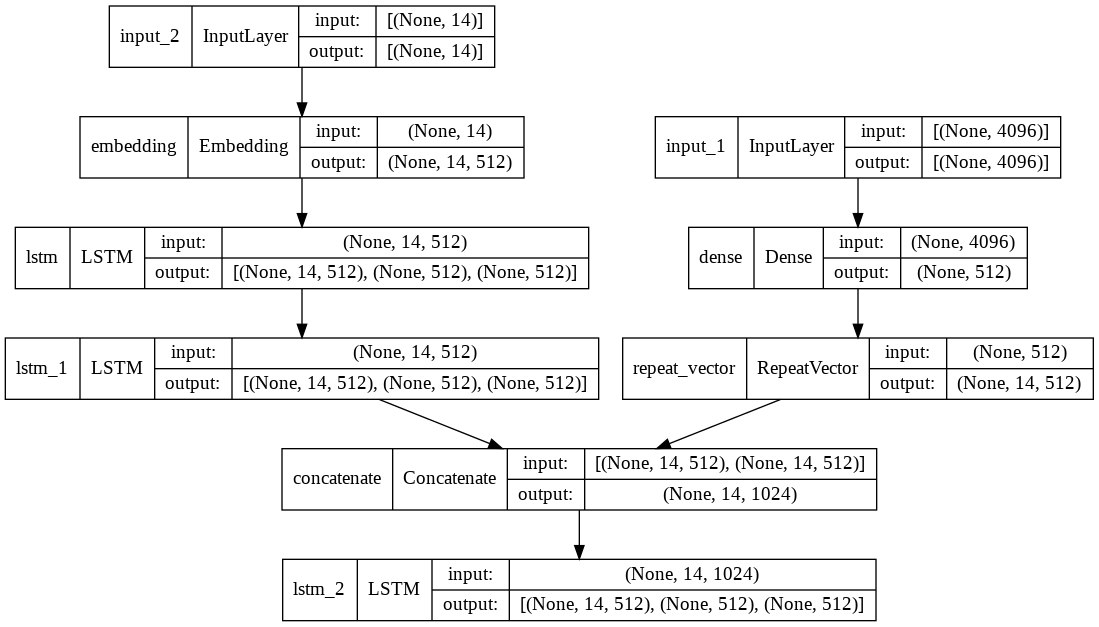

In [ ]:
tf.keras.utils.plot_model(
    encoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(maxlen_english,latent_dim))
print(decoder_inputs.get_shape)
#print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_18')>>


In [ ]:

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])
decoder_model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, None)]       0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, None, 512)    2607616     ['input_18[0][0]']               
                                                                                                  
 input_22 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 input_23 (InputLayer)          [(None, 512)]        0           []                               
                                                                                           

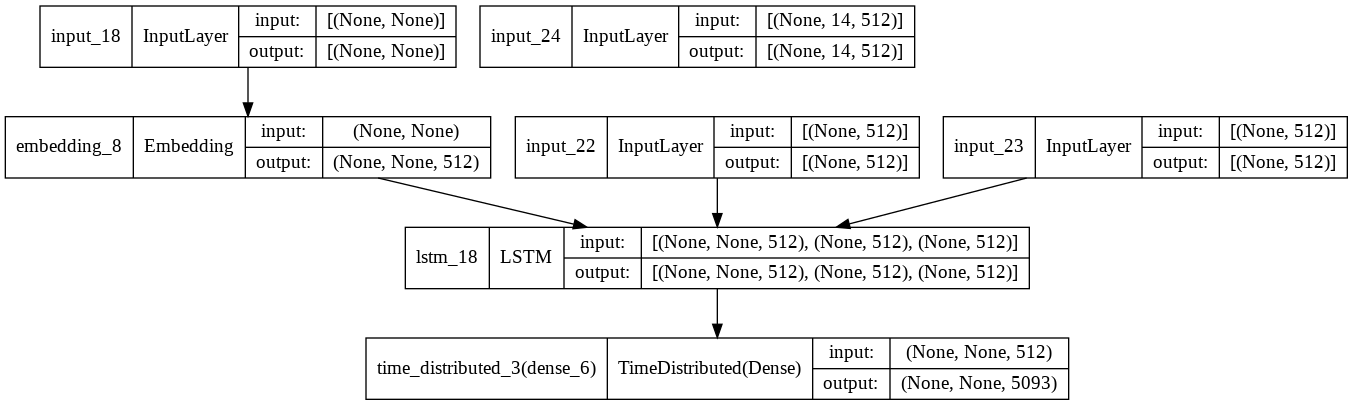

In [ ]:
tf.keras.utils.plot_model(
    decoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
def decode_sequence(input_seq,img):
    img=img[np.newaxis,:]
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict([input_seq,img])
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sos']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eos'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eos'  or len(decoded_sentence.split()) >= (maxlen_malayalam -1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
input_seq=x_tr[i].reshape(1,maxlen_english)
input_seq

array([[158, 234, 159,   3,  48, 235, 236,   0,   0,   0,   0]],
      dtype=int32)

In [ ]:
img=vgg_train_[i]
img

array([0.        , 0.        , 1.80782712, ..., 0.        , 0.        ,
       1.74301958])

In [ ]:
img=img[np.newaxis,:]
img

array([[0.        , 0.        , 1.80782712, ..., 0.        , 0.        ,
        1.74301958]])

In [ ]:
target_seq = np.zeros((1,1))

In [ ]:
target_seq

array([[0.]])

In [ ]:
e_out, e_h, e_c = encoder_model.predict([input_seq,img])

In [ ]:
stop_condition = False
decoded_sentence = ''
while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        print( sampled_token_index)
        print( sampled_token)
        break

3
ഒരു


In [ ]:
target_seq[0, 0] = target_word_index['sos']

In [ ]:
e_out, e_h, e_c = encoder_model.predict([input_seq,img])

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sos']) and i!=target_word_index['eos']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

for i in range(5):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
    print("\n")

Review: male surfer surfing in still in the ocean 
Original summary: ശാന്തമായ കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ 
Predicted summary:  ഒരു കറുത്ത ട്രാഷ് ബാഗ്


Review: it is an indoor scene 
Original summary: ഇത് ഒരു ഇൻഡോർ രംഗമാണ് 
Predicted summary:  ഒരു കറുത്ത ട്രാഷ് ബാഗ്


Review: computer screens turned on 
Original summary: കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി 
Predicted summary:  ഒരു കറുത്ത ട്രാഷ് ബാഗ്


Review: man has short hair 
Original summary: മനുഷ്യന് ചെറിയ മുടിയുണ്ട് 
Predicted summary:  ഒരു കറുത്ത ട്രാഷ് ബാഗ്


Review: photo album open on an adults lap 
Original summary: ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു 
Predicted summary:  ഒരു കറുത്ത ട്രാഷ് ബാഗ്




In [ ]:
i=4
print("Review:",seq2text(x_tr[i]))
#print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
#plt.imshow(imagedata[i].astype(np.float32))

Review: photo album open on an adults lap 
Predicted summary:  ഒരു കറുത്ത ട്രാഷ് ബാഗ്


In [ ]:
for i in range(5):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
    print("\n")

In [ ]:
i=0
print("Review:",seq2text(x_val[i]))
print("Original summary:",seq2summary(y_val[i]))
print("Predicted summary:",decode_sequence(x_val[i].reshape(1,maxlen_english),vgg_val[i]))
#plt.imshow(imagedata[i].astype(np.float32))

Review: fighter jet in the sky 
Original summary: യുദ്ധവിമാനം ആകാശത്ത് 
Predicted summary:  ഒരു കറുത്ത ട്രാഷ് ബാഗ്


In [ ]:
!pip install sacrebleu
import sacrebleu
import random

In [ ]:
temp_o=[]
temp_p=[]
for i in range(50):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,maxlen_english),vgg_train_[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

7.537462099243013


In [ ]:
temp_o=[]
temp_p=[]
for i in range(10000):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,maxlen_english),vgg_train_[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

KeyboardInterrupt: ignored

Review: child in a stroller 
Original summary: ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി 
Predicted summary:  ഒരു കറുത്ത ട്രാഷ് ബാഗ്


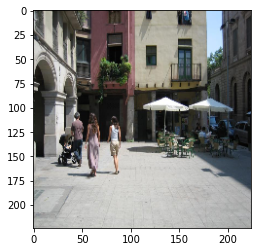

In [ ]:
i=6
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
plt.imshow(imagedata[i].astype(np.float32))

Review: man has short hair 
Original summary: മനുഷ്യന് ചെറിയ മുടിയുണ്ട് 
Predicted summary:  മനുഷ്യൻ സ്റ്റ യിൽ നിൽക്കുന്നു


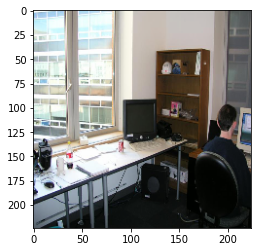

In [ ]:
i=3
print("Review:",seq2text(x_tr[i]))
print("Original summary:",seq2summary(y_tr[i]))
print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,maxlen_english),vgg_train_[i]))
plt.imshow(imagedata[i].astype(np.float32))